In [2]:
import pickle
import numpy as np
from bff_processor.plotting_utils import meta_df, make_stack_boost, plot_w_error_boost, double_list, plot_w_error
from bff_processor.utils import make_view, ratio_plot_template, nratio_plot_template
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import mplhep as hep
hep.set_style(hep.style.CMS)
import pickle
import pandas as pd
import boost_histogram as bh

In [3]:
lumi=35.5
pkl_name = '2016_dilepmass_CRx0'
with open(pkl_name+'.pkl','rb') as f:
    reg_dict_temp = pickle.load(f)

In [4]:
def plot_region(reg, top, bottom, mc_color = 'orange'):

    #mc background
    snom,_,colors,labels = make_stack_boost(meta_df[meta_df.type=='background'],reg_dict_temp, reg, sum_hist=False)
    centers = snom[0].axes[0].centers
    edges = snom[0].axes[0].edges
    dedges = double_list(edges)[1:-1]
    top.stackplot(dedges,*[double_list(s.values()) for s in snom],alpha=.5, colors=colors, labels=labels)
    
    bhist  = make_stack_boost(meta_df[meta_df.type=='background'],reg_dict_temp, reg)
    bnom, bunc = plot_w_error_boost(top,*bhist, color=mc_color, label='MC')
    
    #data
    dhist = make_stack_boost(meta_df[meta_df.type=='data'],reg_dict_temp, reg)
    if dhist[0]:
        dnom, dunc = plot_w_error_boost(top,*dhist, color='black', label='data')
    
    for i,row in meta_df[meta_df.type=='signal'].iterrows():
        sighist  = make_stack_boost(meta_df[meta_df.hname==row.hname],reg_dict_temp, reg)
        if sighist[0]:
            plot_w_error_boost(top,*sighist, color=row.color, label=row.label)
    top.set_yscale('log')
    top.legend(ncol=2)
    top.set_ylim(top=10e4, bottom=1e0)
    
    bottom.plot([edges[0],edges[1]],[1,1], color='black')

    bottom.plot(dedges, bnom/bnom, color=mc_color)
    bottom.fill_between(dedges, *[bunc[0]/bnom,bunc[1]/bnom], color=mc_color, alpha=.5)
    if dhist[0]:
            bottom.plot(dedges, dnom/bnom, color='black')
            bottom.fill_between(dedges, *[dunc[0]/bnom,dunc[1]/bnom], color='black', alpha=.5)
    bottom.set_ylim([0,2])
    
    bottom.set_xlabel('DiLepMass [GeV]')
    top.set_ylabel('Count per 5 GeV')
    hep.cms.label(loc=0,ax=top,lumi=lumi,year=2016)


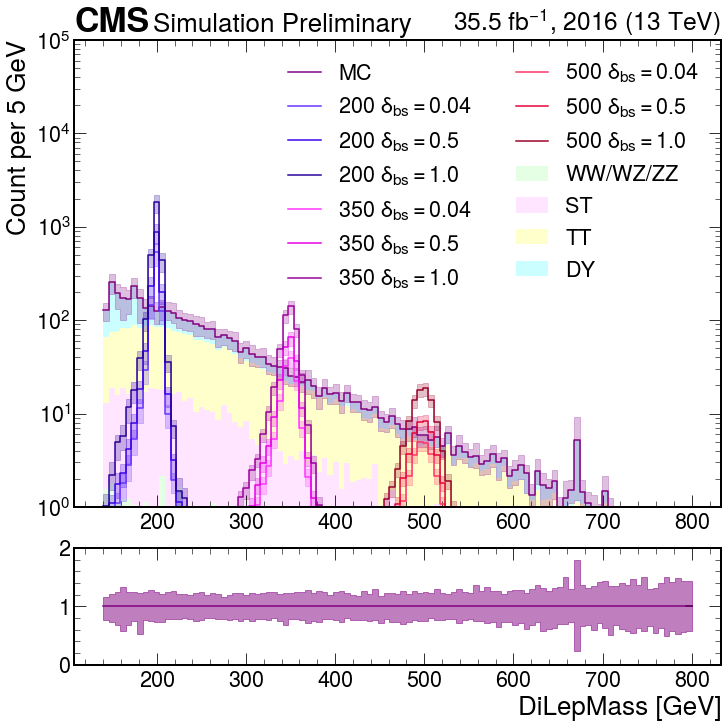

In [5]:
fig, top, bottom = ratio_plot_template( figsize=[10,10])
plot_region('SR1_{}',top,bottom,mc_color='purple')

In [ ]:
for key in reg_dict_temp:
    fig, top, bottom = ratio_plot_template( figsize=[10,10])
    plot_region(key,top,bottom,mc_color='purple')


In [16]:
one_jet_keys = {'SR1_{}':[0,0],
'CR10_{}':[1,0],
'CR13_{}':[0,1],
'CR14_{}':[1,1]}

[]
[0, 0]
[1, 0]
[0, 1]
[1, 1]


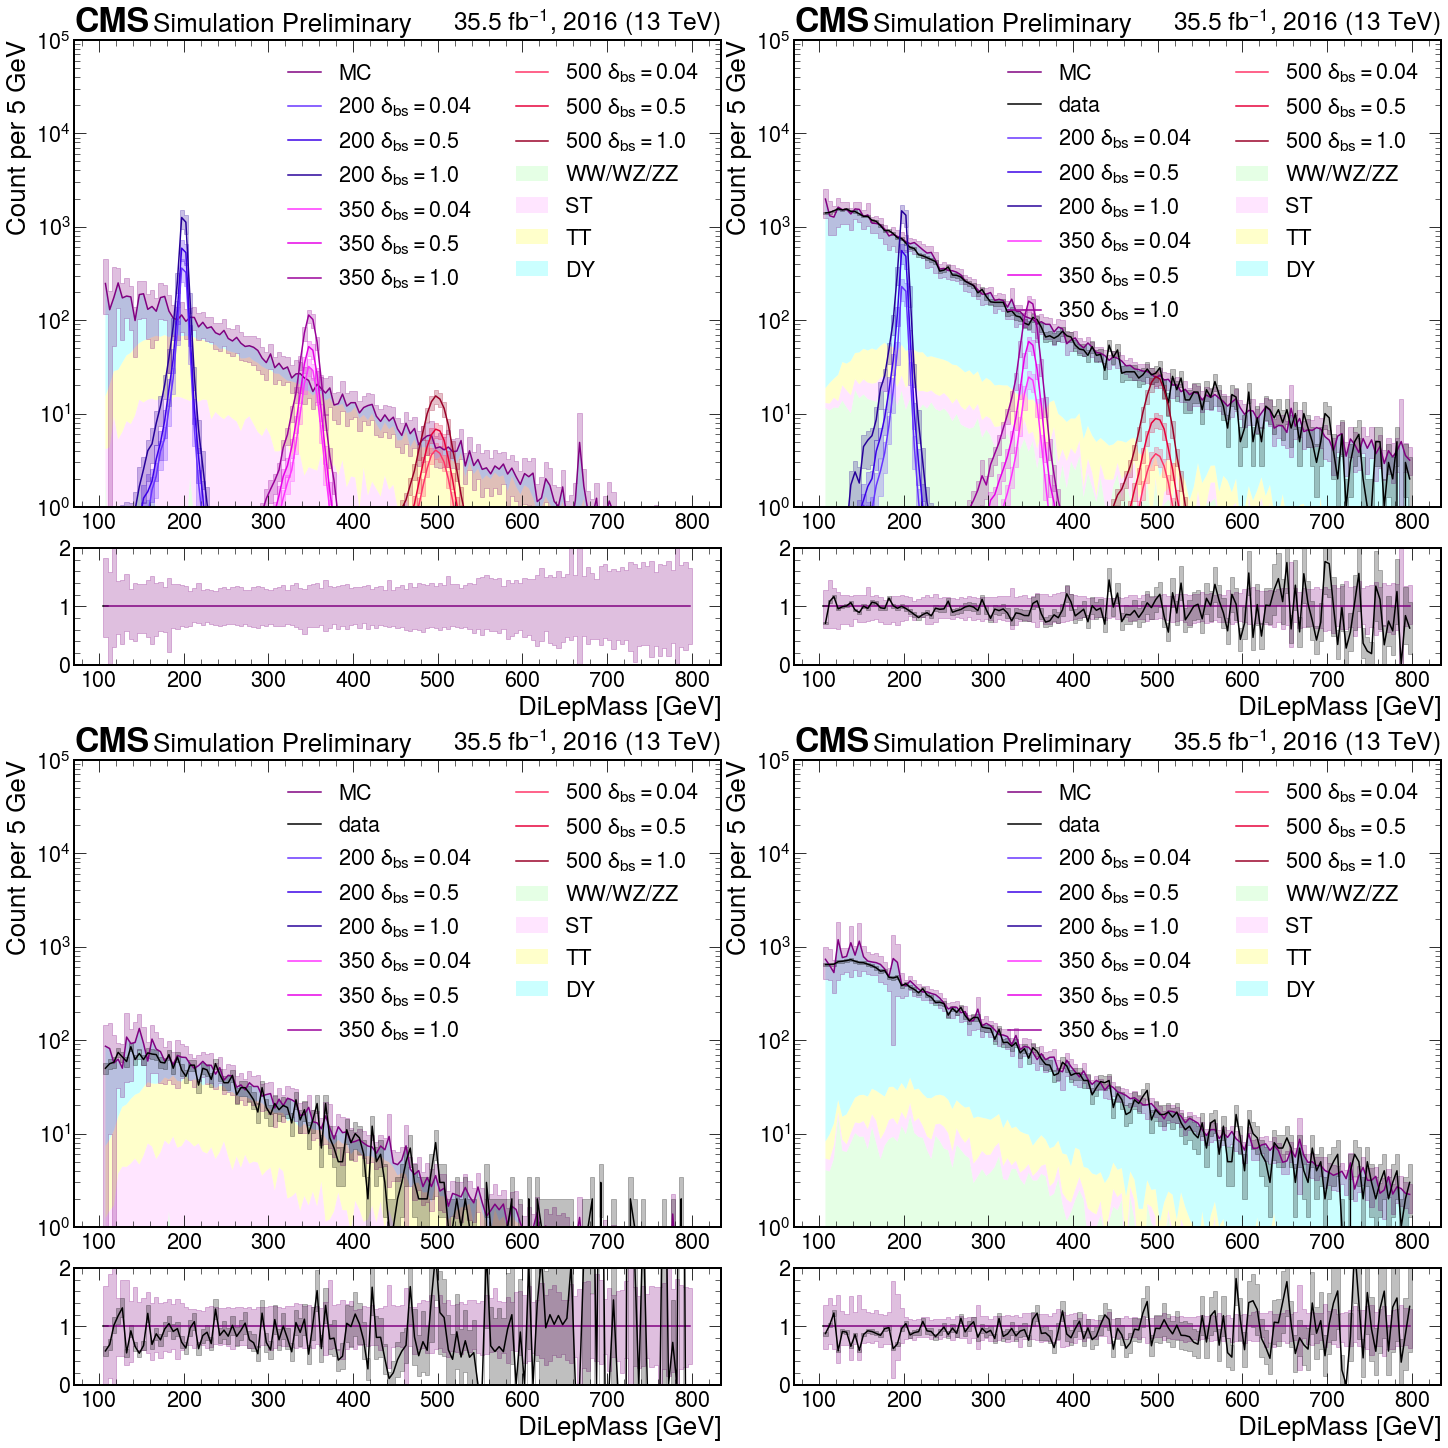

In [21]:
one_jet_keys = {'SR1_{}':[0,0],
'CR10_{}':[1,0],
'CR13_{}':[0,1],
'CR14_{}':[1,1]}
fig, axes = nratio_plot_template(nPlots=[2,2],figsize=[20,20])
for key in one_jet_keys:
    ai = one_jet_keys[key]
    print(ai)
    axs = axes[ai[0]][ai[1]]
    plot_region(key,*axs,mc_color='purple')
fig.savefig('output/{}_1.png'.format(pkl_name))

[]
[0, 0]
[1, 0]
[0, 1]
[1, 1]


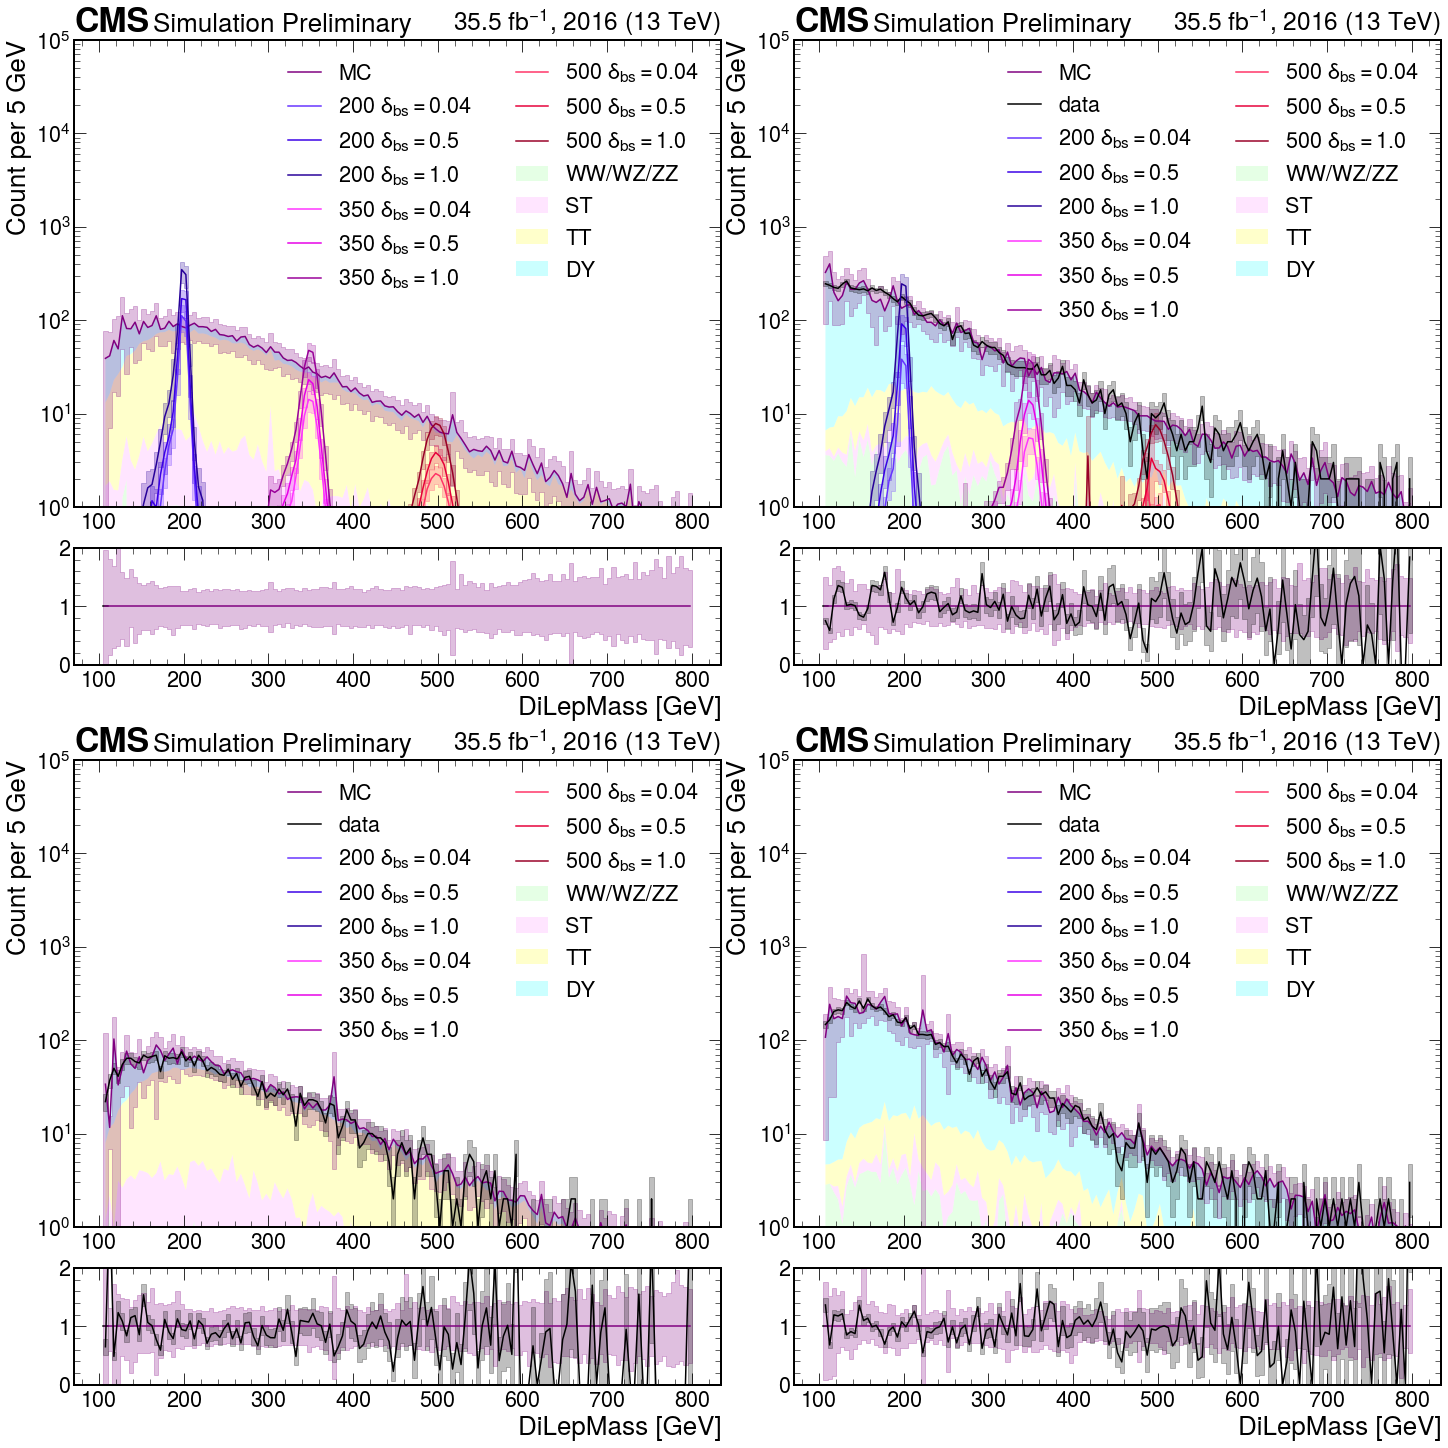

In [22]:
one_jet_keys = {'SR2_{}':[0,0],
'CR20_{}':[1,0],
'CR23_{}':[0,1],
'CR24_{}':[1,1]}
fig, axes = nratio_plot_template(nPlots=[2,2],figsize=[20,20])
for key in one_jet_keys:
    ai = one_jet_keys[key]
    print(ai)
    axs = axes[ai[0]][ai[1]]
    plot_region(key,*axs,mc_color='purple')
fig.savefig('output/{}_2.png'.format(pkl_name))